In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

y_train['RiskPerformance'] = y_train['RiskPerformance'].map({'Bad': 1, 'Good': 0})
X_train[X_train < 0] = np.nan

y_train = y_train.sort_values(by='Unnamed: 0')
X_train = X_train.sort_values(by = 'Unnamed: 0')

X_train = X_train.drop(X_train.columns[0], axis=1)
y_train = y_train.drop(y_train.columns[0], axis=1)

mask = ~X_train.isnull().all(axis=1)

X_train = X_train[mask]
    
y_train = y_train[mask]

Basic data overview, basic statistics, looking for missing values

In [4]:
print("Data Overview:")
print(X_train.info())
print("\nShape:", X_train.shape)
print("\nMissing Values:\n", X_train.isnull().sum().sort_values(ascending=False).head())

print("\nBasic Statistics:")
print(X_train.describe())



Data Overview:
<class 'pandas.core.frame.DataFrame'>
Index: 3457 entries, 33 to 2815
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      3453 non-null   float64
 1   X2      3386 non-null   float64
 2   X3      3457 non-null   float64
 3   X4      3457 non-null   float64
 4   X5      3457 non-null   float64
 5   X6      3457 non-null   float64
 6   X7      3457 non-null   float64
 7   X8      3457 non-null   float64
 8   X9      1709 non-null   float64
 9   X10     3457 non-null   float64
 10  X11     3457 non-null   float64
 11  X12     3457 non-null   float64
 12  X13     3457 non-null   float64
 13  X14     3457 non-null   float64
 14  X15     2653 non-null   float64
 15  X16     3457 non-null   float64
 16  X17     3457 non-null   float64
 17  X18     3392 non-null   float64
 18  X19     2212 non-null   float64
 19  X20     3401 non-null   float64
 20  X21     3137 non-null   float64
 21  X22     3223 non-null   fl

Plotting distribution of numerical features

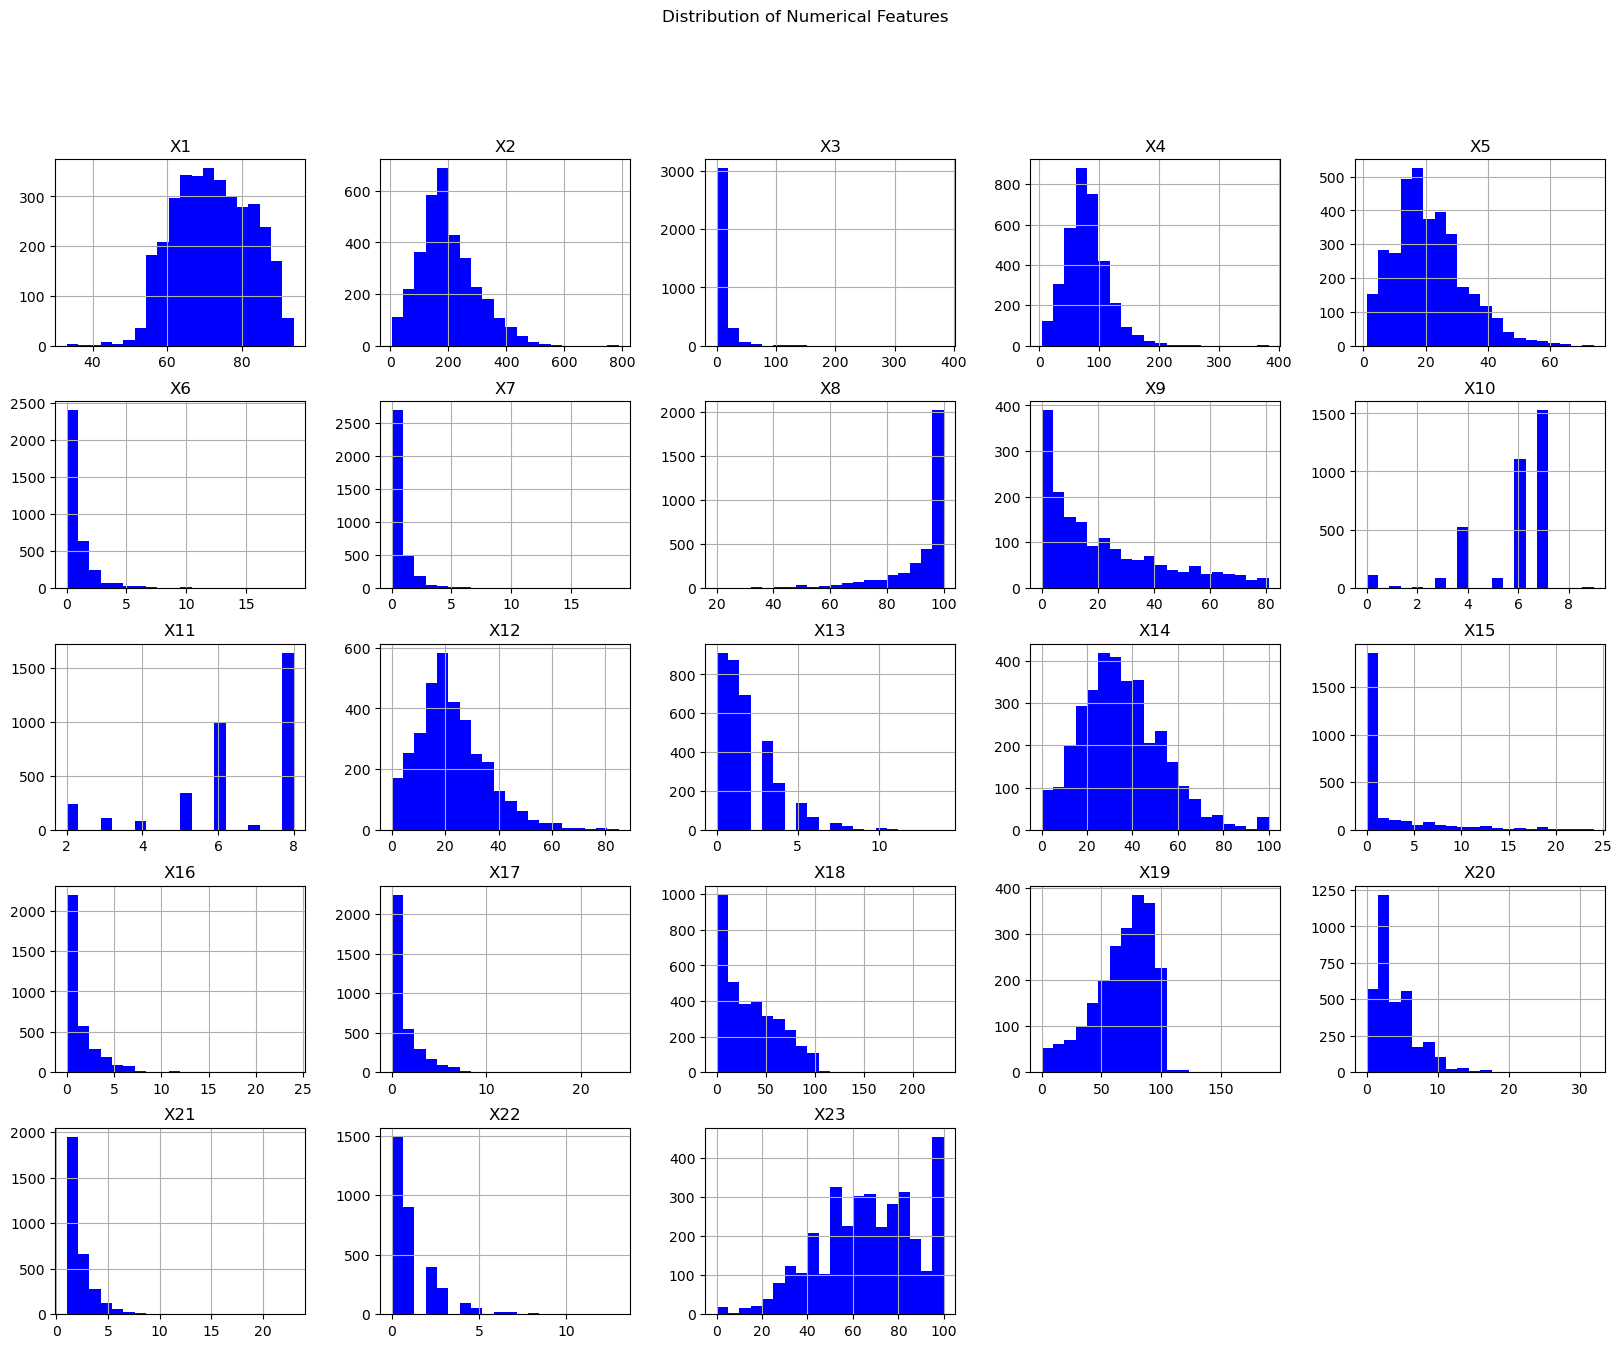

In [5]:
if 'Unnamed: 0' in X_train.columns:
    X_train = X_train.drop(columns=['Unnamed: 0'])
X_train.hist(bins=20, figsize=(20, 15), color='blue')
plt.suptitle('Distribution of Numerical Features')
plt.show()

Plotting distribution of categorical features

C:\Users\Admin\AppData\Local\Temp\ipykernel_23844\1174723003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=X_train, hue=None, palette='viridis', legend=False)


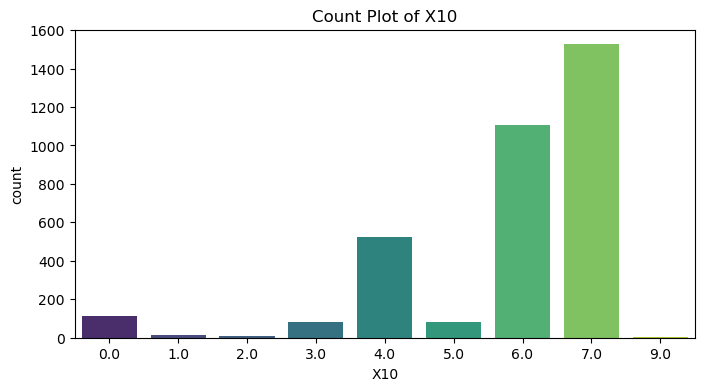

C:\Users\Admin\AppData\Local\Temp\ipykernel_23844\1174723003.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=X_train, hue=None, palette='viridis', legend=False)


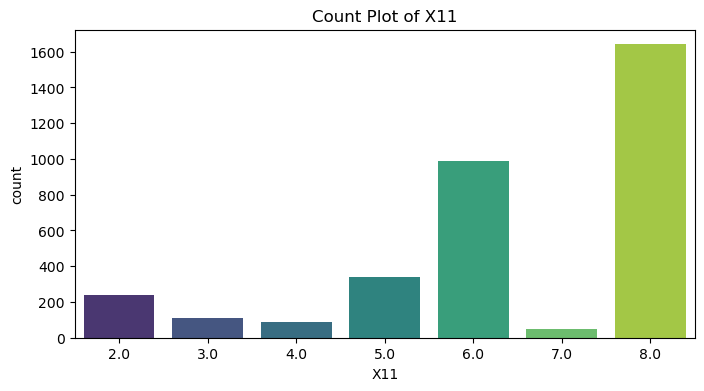

In [ ]:
categorical_features = ['X10', 'X11']
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=feature, data=X_train, hue=None, palette='viridis', legend=False)
    plt.title(f'Count Plot of {feature}')
    plt.show()


Plotting correlation heatmap

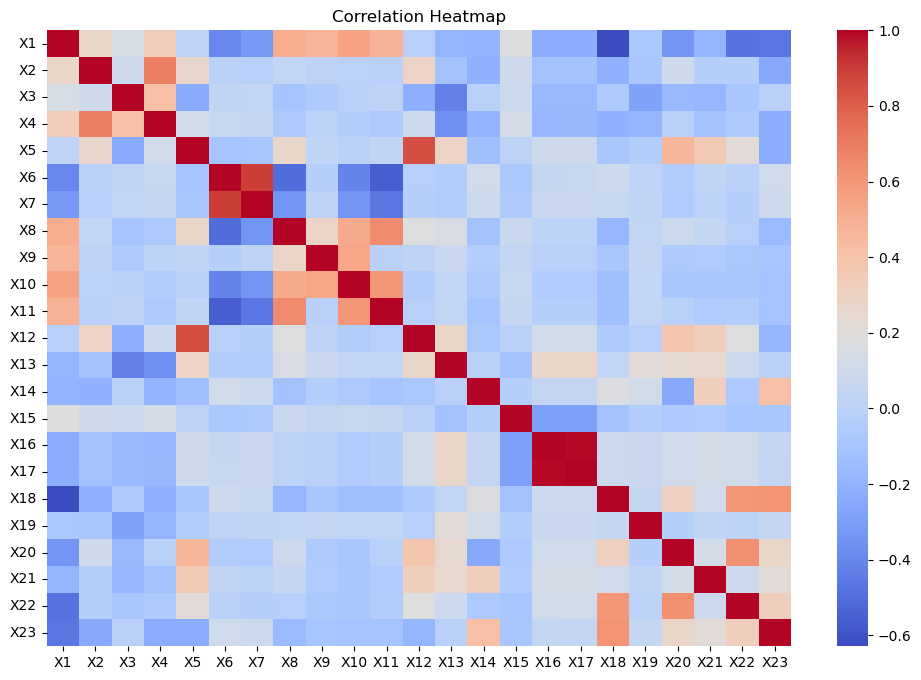

In [6]:
plt.figure(figsize=(12, 8))
sns.heatmap(X_train.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Plotting pairplots for mixtures of both categorical and numerical features

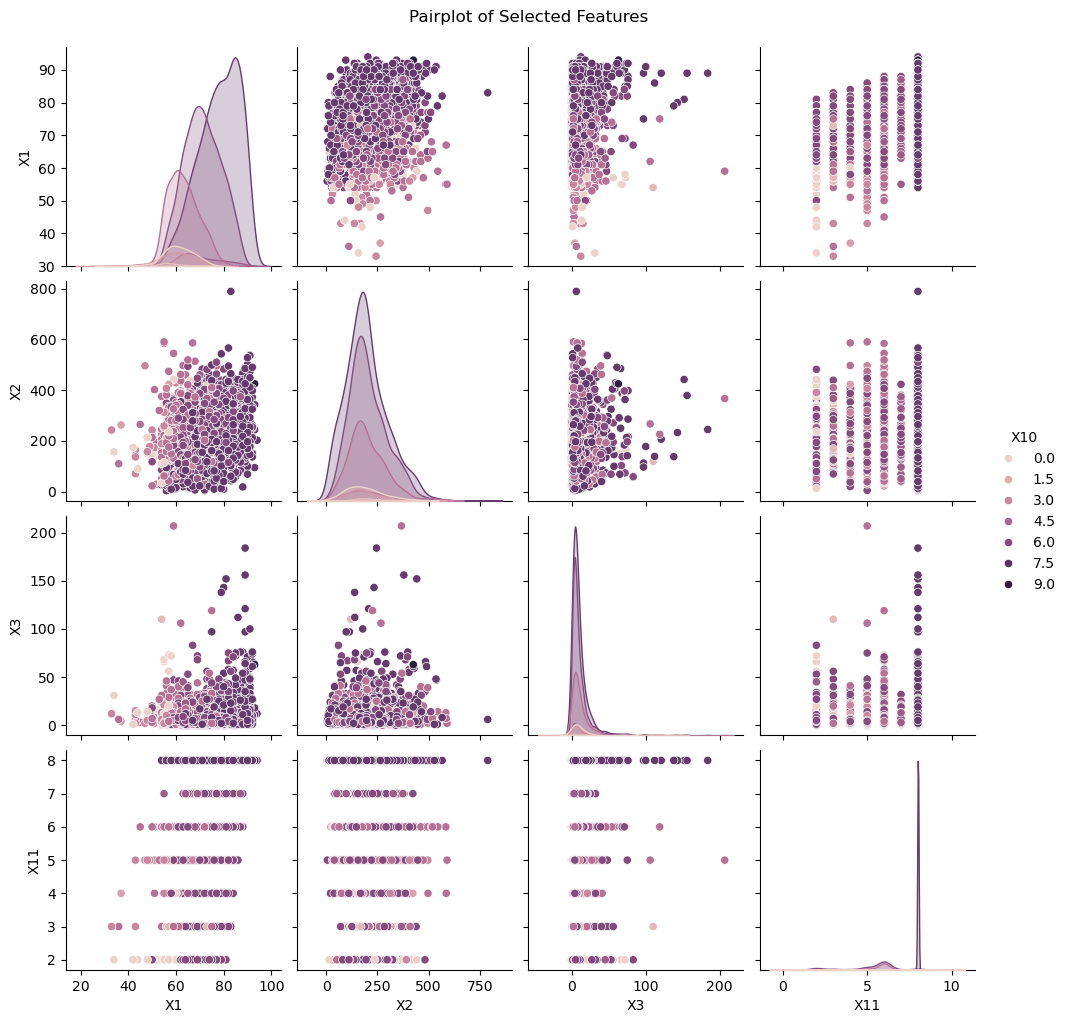

In [ ]:
sns.pairplot(X_train[['X1', 'X2', 'X3', 'X10', 'X11']].dropna(), hue='X10', diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()


Plotting boxplots for few features

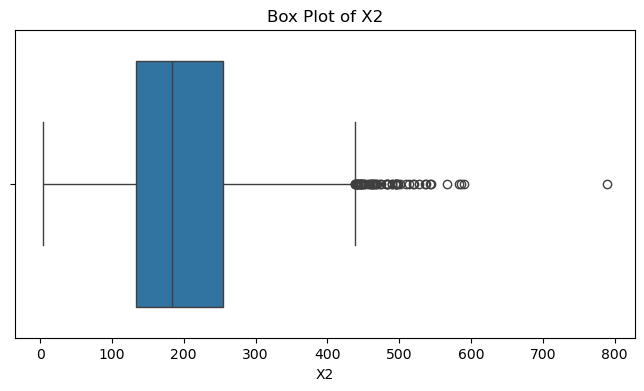

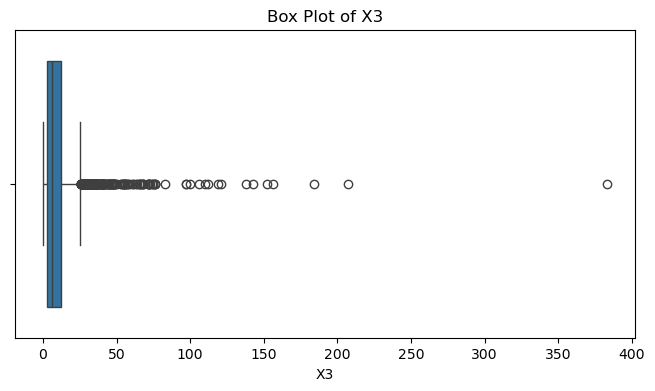

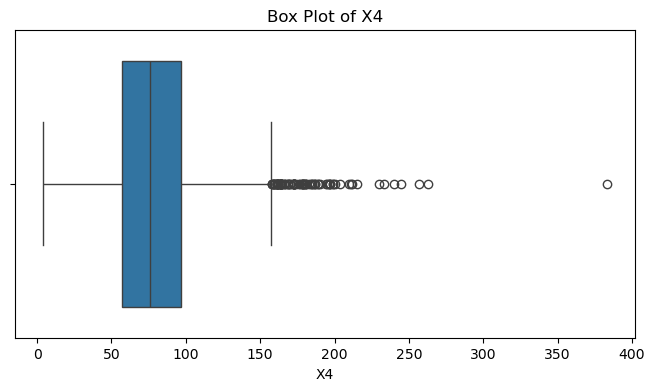

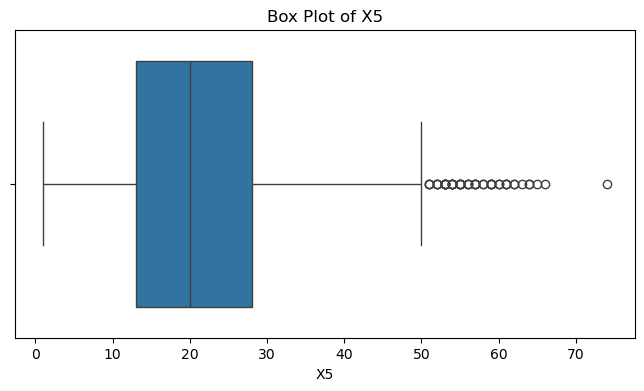

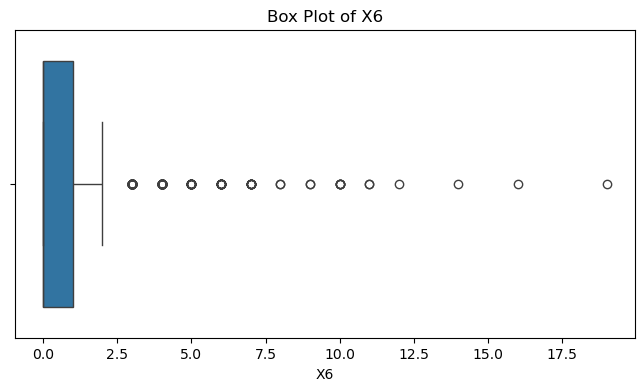

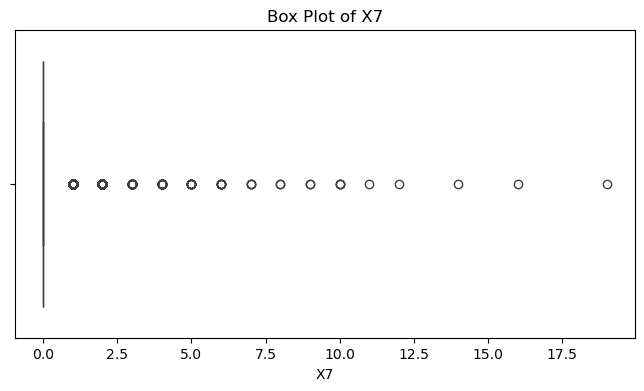

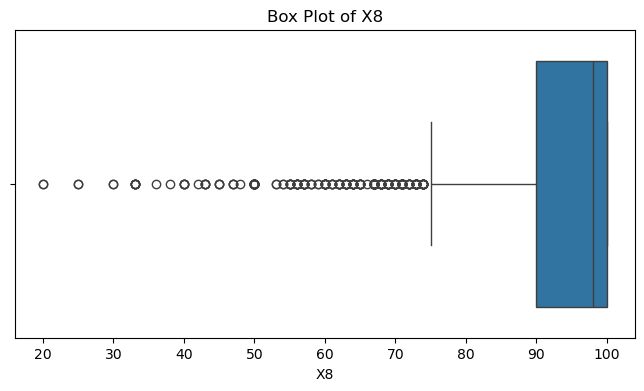

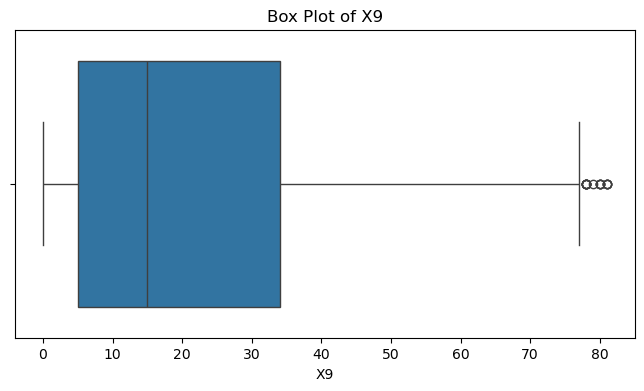

In [ ]:

for feature in X_train.columns[1:9]:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=X_train[feature])
    plt.title(f'Box Plot of {feature}')
    plt.show()


Plotting distribution of target variable

C:\Users\Admin\AppData\Local\Temp\ipykernel_23844\3007278441.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Target', data=data, palette='viridis')


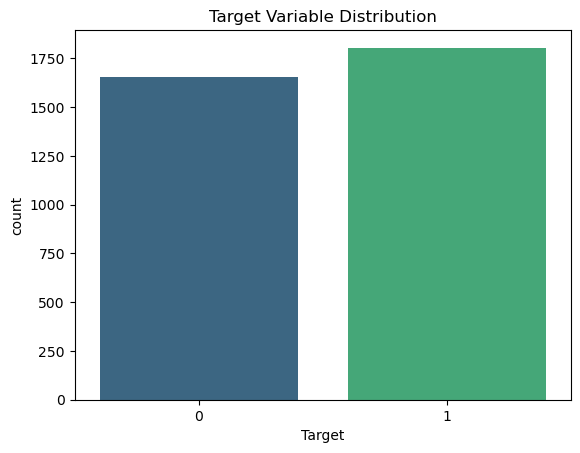

In [ ]:
data = X_train.copy()
data['Target'] = y_train
sns.countplot(x='Target', data=data, palette='viridis')
plt.title('Target Variable Distribution')
plt.show()
